Import des bibliothèques

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from pandas.core.common import random_state
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor

Chargement et exploration des données

In [ ]:
df = pd.read_excel("Dataset.xlsx")
df.head()

,SEANCE,INDICE,COURS_CLOTURE,COURS_PLUS_HAUT,COURS_PLUS_BAS,COURS_OUVERTURE,COURS_VEILLE,VARIATION
0,2023-12-08 00:00:00.000,MASI,11885.32,11885.32,11824.97,11827.02,11827.02,0.49
1,2023-12-07 00:00:00.000,MASI,11827.02,11827.02,11757.60,11757.60,11757.60,0.59
2,2023-12-06 00:00:00.000,MASI,11757.60,11792.95,11718.07,11759.51,11759.51,-0.02
3,2023-12-05 00:00:00.000,MASI,11759.51,11785.10,11709.49,11728.06,11728.06,0.27
4,2023-12-04 00:00:00.000,MASI,11728.06,11769.43,11702.27,11748.19,11748.19,-0.17


In [ ]:
df.isnull().sum()

SEANCE             0
INDICE             0
COURS_CLOTURE      0
COURS_PLUS_HAUT    0
COURS_PLUS_BAS     0
COURS_OUVERTURE    0
COURS_VEILLE       0
VARIATION          0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2366 entries, 0 to 2365
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SEANCE           2366 non-null   object 
 1   INDICE           2366 non-null   object 
 2   COURS_CLOTURE    2366 non-null   float64
 3   COURS_PLUS_HAUT  2366 non-null   float64
 4   COURS_PLUS_BAS   2366 non-null   float64
 5   COURS_OUVERTURE  2366 non-null   float64
 6   COURS_VEILLE     2366 non-null   float64
 7   VARIATION        2366 non-null   float64
dtypes: float64(6), object(2)
memory usage: 148.0+ KB


<ipython-input-52-a68b97f3e400>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


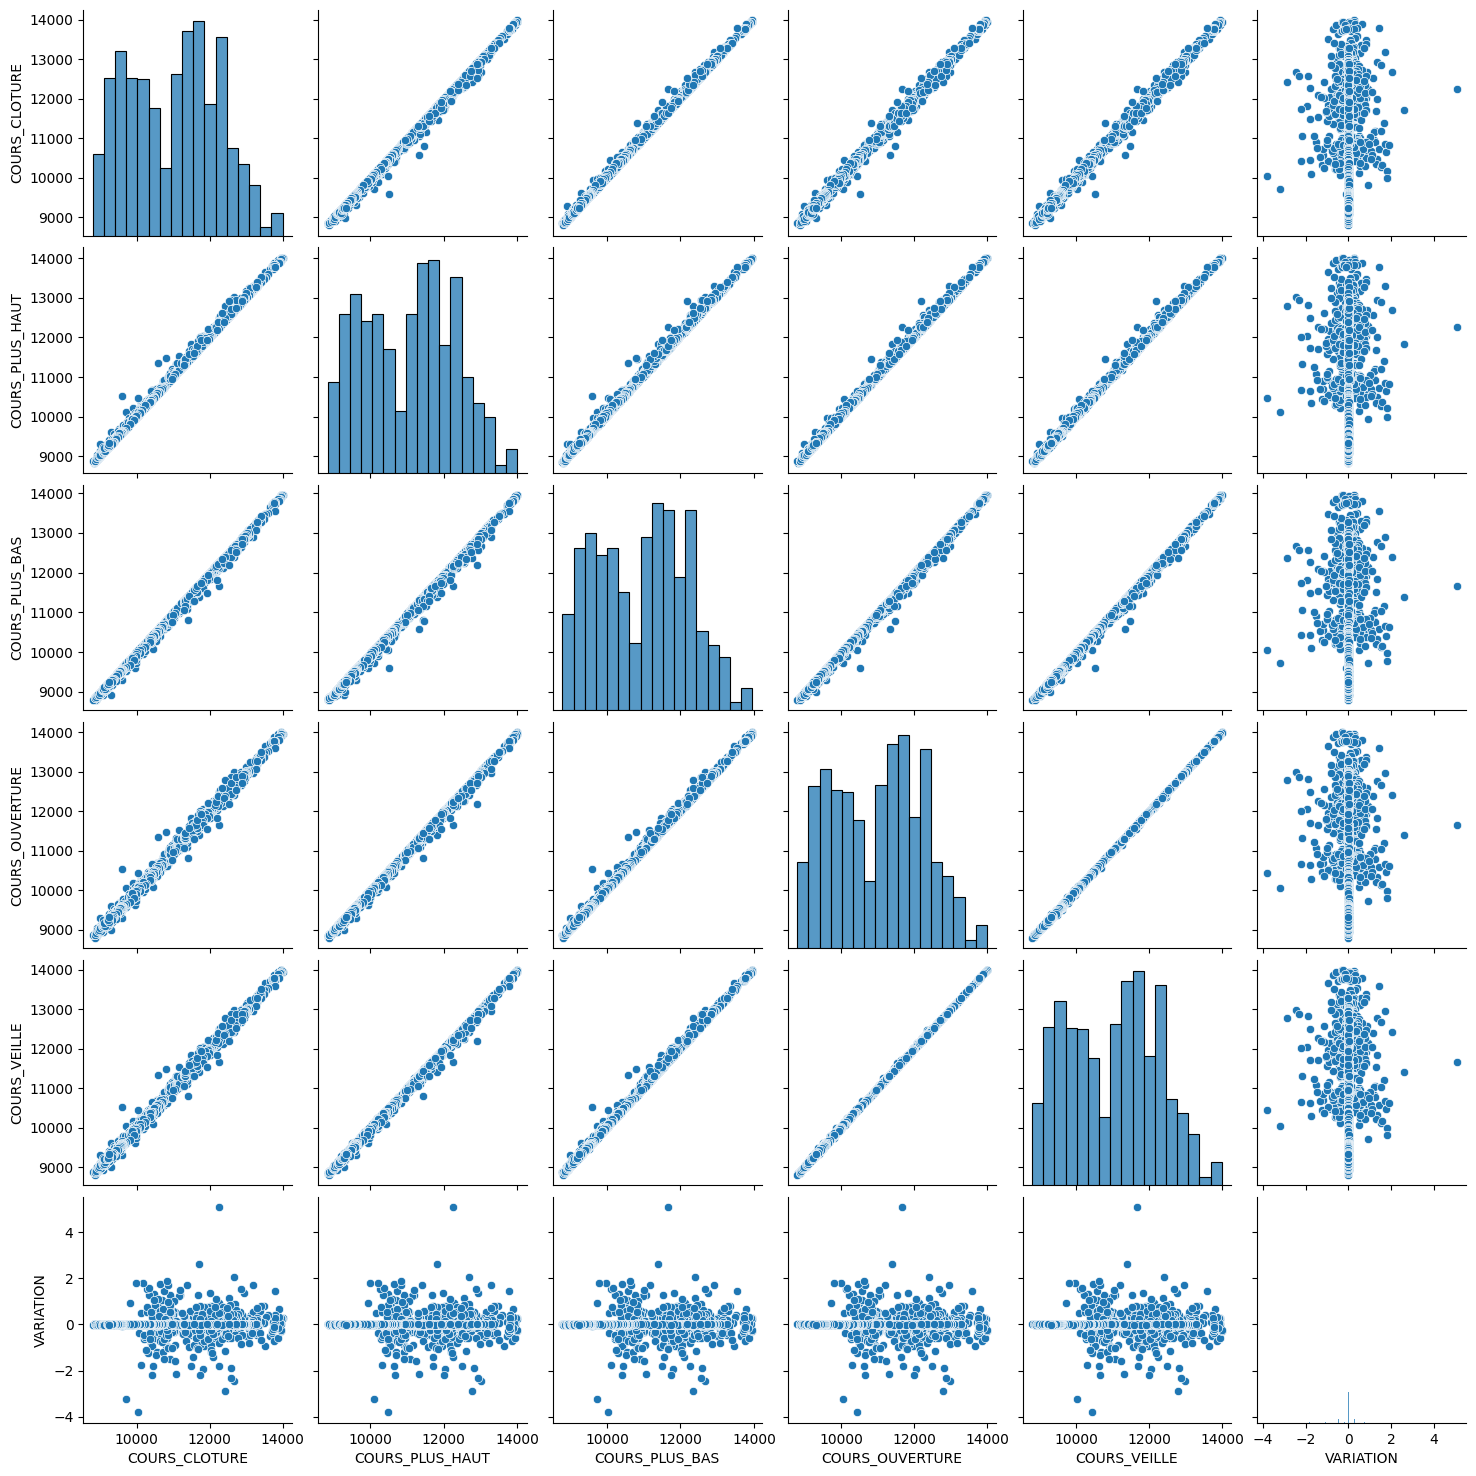

In [ ]:
# prompt: fais une analyse exploratoire des données

df.info()
df.describe()
df.corr()
sns.pairplot(df)
plt.show()


In [ ]:
print(df.describe())

       COURS_CLOTURE  COURS_PLUS_HAUT  COURS_PLUS_BAS  COURS_OUVERTURE  \
count    2366.000000      2366.000000     2366.000000      2366.000000   
mean    11007.492700     11046.029461    10962.958392     11003.195150   
std      1228.034432      1234.011316     1225.577153      1230.984464   
min      8796.650391      8837.969727     8789.889648      8796.650391   
25%      9927.517578      9957.692383     9888.077393      9923.909678   
50%     11159.635254     11201.135254    11119.455078     11156.564941   
75%     11969.242559     12012.205000    11918.409902     11971.260000   
max     13991.470000     14012.640000    13950.560000     13991.470000   

       COURS_VEILLE    VARIATION  
count   2366.000000  2366.000000  
mean   11006.688533    -0.001067  
std     1228.639022     0.344325  
min     8796.650391    -3.820000  
25%     9927.104736    -0.004097  
50%    11158.260254     0.000210  
75%    11971.260000     0.004357  
max    13991.470000     5.080000  


In [ ]:
df.corr()

<ipython-input-55-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,COURS_CLOTURE,COURS_PLUS_HAUT,COURS_PLUS_BAS,COURS_OUVERTURE,COURS_VEILLE,VARIATION
COURS_CLOTURE,1.000000,0.999008,0.999233,0.998074,0.998048,0.011831
COURS_PLUS_HAUT,0.999008,1.000000,0.998821,0.999173,0.999133,-0.005982
COURS_PLUS_BAS,0.999233,0.998821,1.000000,0.999137,0.999115,-0.004373
COURS_OUVERTURE,0.998074,0.999173,0.999137,1.000000,0.999955,-0.021070
COURS_VEILLE,0.998048,0.999133,0.999115,0.999955,1.000000,-0.021275
VARIATION,0.011831,-0.005982,-0.004373,-0.021070,-0.021275,1.000000


Prétraitement et transformation des données

In [ ]:
# pretraitement  et transformation des données
df = df.set_index('SEANCE')
df['diff'] = df['COURS_CLOTURE'] - df['COURS_VEILLE']
df['diff_pourcentage'] = df['diff'] / df['COURS_VEILLE'] * 100
df['variation'] = df['VARIATION'] * 100


In [ ]:
df['INDICE'] = df['INDICE'].astype('category')
df['INDICE'] = df['INDICE'].cat.codes

In [ ]:
df.head()

,INDICE,COURS_CLOTURE,COURS_PLUS_HAUT,COURS_PLUS_BAS,COURS_OUVERTURE,COURS_VEILLE,VARIATION,diff,diff_pourcentage,variation
SEANCE,,,,,,,,,,
2023-12-08 00:00:00.000,0,11885.32,11885.32,11824.97,11827.02,11827.02,0.49,58.30,0.492939,49.0
2023-12-07 00:00:00.000,0,11827.02,11827.02,11757.60,11757.60,11757.60,0.59,69.42,0.590427,59.0
2023-12-06 00:00:00.000,0,11757.60,11792.95,11718.07,11759.51,11759.51,-0.02,-1.91,-0.016242,-2.0
2023-12-05 00:00:00.000,0,11759.51,11785.10,11709.49,11728.06,11728.06,0.27,31.45,0.268160,27.0
2023-12-04 00:00:00.000,0,11728.06,11769.43,11702.27,11748.19,11748.19,-0.17,-20.13,-0.171346,-17.0



```
# Division des données en ensembles d'entraînement et de test
Préparation du modèle et évaluation des performances
```

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['INDICE','COURS_PLUS_HAUT', 'COURS_PLUS_BAS', 'COURS_OUVERTURE', 'COURS_VEILLE']], df['COURS_CLOTURE'], test_size=0.25)

# Create a linear regression model
model = RandomForestRegressor()

parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
# Train
grid_search = GridSearchCV(model,parameters, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

prédictions sur l'ensemble de test avec le modèle optimisé

In [ ]:
# Make predictions
y_pred = grid_search.predict(X_test)

Évaluation des performances du modèle (MSE, RMSE, Accuracy, validation croisée)


Mean squared error: 1823.1982605904611
Root mean squared error: 42.69892575452527


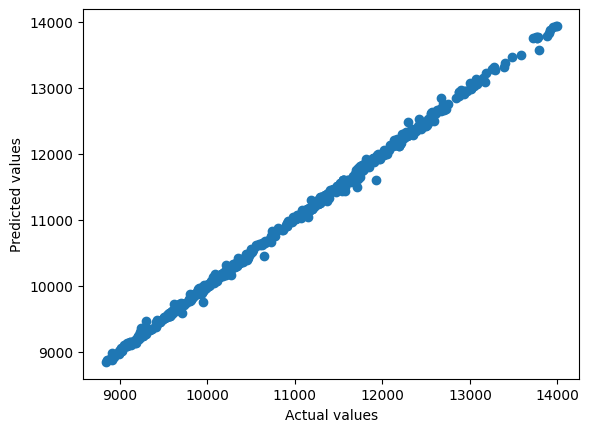

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)
rmse = np.sqrt(mse)
print('Root mean squared error:', rmse)

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()


In [ ]:
# accuracy du modele
accuracy = grid_search.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9988151298089296


In [ ]:
# Optimize the MSE
best_params = grid_search.best_params_
model = RandomForestRegressor(**best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)


MSE: 1791.340577269783


In [ ]:
mse = np.sqrt(mse)
print('Root mean squared error:', rmse)

Root mean squared error: 42.43827383266138


In [ ]:
#  Validation Croisée (Cross-Validation)
scores = cross_val_score(model, X_train, y_train, cv=5)
print('Cross-validation scores:', scores)


Cross-validation scores: [0.99880552 0.99899018 0.99819809 0.99863117 0.99845409]
